Score over time: 0.72802
Final Q-Table Values
[[2.22269878e-01 5.95659317e-03 6.27181830e-03 6.19693482e-03]
 [3.96518809e-04 7.43214205e-05 1.42671635e-03 1.78466795e-01]
 [8.43413938e-04 4.48389824e-04 9.24538433e-04 1.73492420e-01]
 [3.23193121e-04 3.66292885e-04 2.19139326e-04 1.07070337e-01]
 [3.07670691e-01 3.86870663e-04 2.66657415e-03 7.03606196e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.95782666e-06 2.06018295e-06 1.74950768e-01 1.93428216e-09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.19610998e-03 3.54791060e-04 3.30060536e-01]
 [5.54254263e-04 2.06828852e-01 0.00000000e+00 7.31308993e-04]
 [1.54127854e-01 8.91484214e-05 5.04455500e-07 5.30786053e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.61466901e-03 2.72821805e-03 2.83659296e-01 0.00000000e+00]
 [0.00000000e+00 8.77002120e-01 0.00000000e+00 0.00000000e+00]
 [0.00000

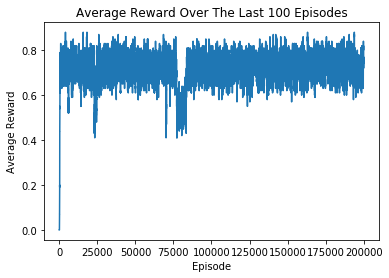

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')

#Initialize Q table
Q = np.zeros([env.observation_space.n,env.action_space.n])

# Set learning parameter
lr = .8
# Set Gamma
y = .95
num_episodes = 200000

#List to store the rewards per episode
rewardList = []
yy = []

for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    totalReward = 0
    done = False
    j=0
    #The Q-Table learning algorithm
    while j < 99: #Doesn't have to be 99, this is just to be safe.
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        state_next,reward, done, _ = env.step(a)

        #Update Q-Table
        #Bellman Equation
        Q[s,a] = Q[s,a] + lr*(reward + y*np.max(Q[state_next,:]) - Q[s,a])
        totalReward += reward
        s = state_next
        if done == True:
            break
    rewardList.append(totalReward)

print("Score over time: " +  str(sum(rewardList)/num_episodes))
print("Final Q-Table Values")
print(Q)

toPlot = []

for i in range(len(rewardList)):
    if i<100:
        theSum = 0
        for j in range(i):
            theSum += rewardList[j]
        avgReward = theSum/(i+1)
        toPlot.append(avgReward)  
    elif i>100:
        theSum = 0
        for j in range((i-99),i):
            theSum += rewardList[j]
        avgReward = theSum/(100)
        toPlot.append(avgReward)
        
plt.plot(toPlot)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward Over The Last 100 Episodes')
plt.show()